In [510]:
#Load Dataset
import pandas as pd
df=pd.read_csv('archive/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [511]:
#number of recodes of every columns
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [512]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: >

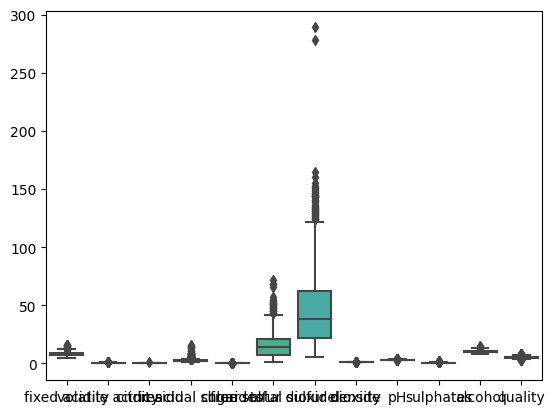

In [513]:
#boxplot for check outlyer
import seaborn as sns
sns.boxplot(df)

In [514]:
#outlier remover function
import seaborn as sns
def outLier_remover(dataset, column,max_quantile,min_quantile):
    max=dataset[column].mean() + max_quantile*dataset[column].std()
    min=dataset[column].mean() - min_quantile*dataset[column].std()
    print("Highest allowed",max)
    print("Lowest allowed",min)


    print("len of outlier",len(dataset[(dataset[column] > max) | (dataset[column] < min)]))
    df= dataset[(dataset[column] < max) & (dataset[column] > min)]
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16,8))

    plt.subplot(2,2,2)
    sns.boxplot(dataset[column])

    plt.subplot(2,2,4)
    sns.boxplot(df[column])

    plt.show()

    return df

Highest allowed 276.7350637183249
Lowest allowed -19.322856586366754
len of outlier 2


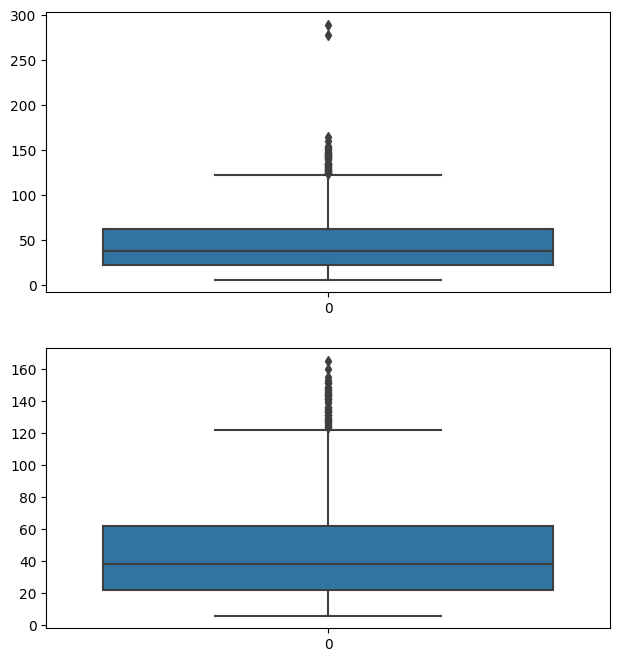

In [515]:
#remove outliyer 
df=outLier_remover(df,"total sulfur dioxide",7,2)

In [516]:
#seprata x & y value
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [517]:
#number of classes of dataset
y.value_counts()

quality
5    681
6    638
7    197
4     53
8     18
3     10
Name: count, dtype: int64

In [518]:
#balance dataset
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x,y=sm.fit_resample(x,y)

In [519]:
#import train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [520]:
#number of classes
y_train.value_counts()

quality
5    561
4    553
7    547
3    537
8    536
6    534
Name: count, dtype: int64

In [521]:
#implement and train model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(criterion="gini")
model.fit(x_train,y_train)

RandomForestClassifier()

In [522]:
#predict test data
pre=model.predict(x_test)

In [523]:
from sklearn.metrics import accuracy_score

In [524]:
#model accuracy
accuracy_score(pre,y_test)

0.882640586797066

In [526]:
#Save model weight
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [525]:
#classification report
from sklearn.metrics import classification_report
 
# Step 7: View the Classification Report
print(classification_report(y_test, pre))

              precision    recall  f1-score   support

           3       0.97      1.00      0.98       144
           4       0.92      0.93      0.92       128
           5       0.70      0.77      0.73       120
           6       0.82      0.63      0.72       147
           7       0.88      0.97      0.93       134
           8       0.98      0.99      0.99       145

    accuracy                           0.88       818
   macro avg       0.88      0.88      0.88       818
weighted avg       0.88      0.88      0.88       818



In [ ]:
#python main.py --fixed_acidity 7.4, --volatile_acidity 0.700, --citric_acid 0.00, --residual_sugar 1.9, --chlorides 0.076, --free_sulfur_dioxide 11.0, --total_sulfur_dioxide 34.0, --density 0.99780, --pH 3.51, --sulphates 0.56, --alcohol 9.5